# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('./train_data.csv')
resource_data = pd.read_csv('./resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1

In [6]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [7]:
project_grade_category = []
for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_") 
    project_grade_category.append(a)

In [8]:
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_6-8', 'Grades_6-8', 'Grades_PreK-2', 'Grades_PreK-2']

In [9]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [10]:
project_data["project_grade_category"] = project_grade_category

In [11]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_subject_categories  \
55660           CA 2016-04-27 00:27:36             Math & Science   
76127           UT 2016-04-27 00:31:25              Special Needs   
51140           CA 2016-04-27 00:46:53        Literacy & Language   
473             GA 2016-04-27 00:53:00           Applied Learning   
41558           WA 2016-04-27 01:05:25        Literacy & Language   

                 project_subject_subcategories  \
55660  Applied Sciences, Health & Life Science   
76127                            Special Needs   
51140                                 Literacy   
473                          Early Development   
41558                                 Literacy   

                                        project_title  \
55660    Engineering STEAM into the Primary Classroom   
76127                         Sensory Tools for Focus   
51140  Mobile Learning with a Mobile Listening Center   
473            Flexible Seating for Flexible Learning   
41558          Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

      project_grade_category  
55660          Grades_PreK-2  
76127             Grades_6-8  
51140             Grades_6-8  
473            Grades_PreK-2  
41558          Grades_PreK-2

## 1.2 preprocessing of `project_subject_categories`

In [12]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of `project_subject_subcategories`

In [13]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### New feature "Number of Words in Title"

In [14]:
title_word_count = []

In [15]:
for a in project_data["project_title"] : 
    b = len(a.split()) 
    title_word_count.append(b)

In [16]:
project_data["title_word_count"] = title_word_count

In [17]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
55660           CA 2016-04-27 00:27:36   
76127           UT 2016-04-27 00:31:25   
51140           CA 2016-04-27 00:46:53   
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                        project_title  \
55660    Engineering STEAM into the Primary Classroom   
76127                         Sensory Tools for Focus   
51140  Mobile Learning with a Mobile Listening Center   
473            Flexible Seating for Flexible Learning   
41558          Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

      project_grade_category   clean_categories  \
55660          Grades_PreK-2       Math_Science   
76127             Grades_6-8       SpecialNeeds   
51140             Grades_6-8  Literacy_Language   
473            Grades_PreK-2    AppliedLearning   
41558          Grades_PreK-2  Literacy_Language   

                      clean_subcategories  title_word_count  
55660  AppliedSciences Health_LifeScience                 6  
76127                        SpecialNeeds                 4  
51140                            Literacy                 7  
473                      EarlyDevelopment                 5  
41558                            Literacy                

### Combine 4 Project essays into 1 Essay

In [18]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

### Introducing new feature "Number of Words in Essay"

In [19]:
essay_word_count = []

In [20]:
for ess in project_data["essay"] : 
    c = len(ess.split()) 
    essay_word_count.append(c)

In [21]:
project_data["essay_word_count"] = essay_word_count

In [22]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date  \
55660           CA 2016-04-27 00:27:36   
76127           UT 2016-04-27 00:31:25   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      project_grade_category clean_categories  \
55660          Grades_PreK-2     Math_Science   
76127             Grades_6-8     SpecialNeeds   

                      clean_subcategories  title_word_count  \
55660  AppliedSciences Health_LifeScience                 6   
76127                        SpecialNeeds                 4   

                                                   essay  essay_word_count  
55660  I have been fortunate enough to use the Fairy ...               285  
76127  Imagine being 8-9 years old. You're in your th...               345

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [23]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [24]:
X_train.drop(['project_is_approved'], axis=1, inplace=True) 
X_test.drop(['project_is_approved'], axis=1, inplace=True) 
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

## 1.3 Text preprocessing

In [25]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [26]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [27]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [28]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [29]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [30]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### 1.3.1 Preprocessed Train data (Text)

In [31]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:33<00:00, 1478.82it/s]


In [32]:
# after preprocesing
preprocessed_essays_train[20000]

'i 23 awesome kindergarten students class many no preschool experience class first time attended school they excited every little thing class i want give many opportunities possible grow learn having necessary resources make difference students they need materials help explore create discover my children need lots opportunities explore alphabet having hands materials makes learning much easier they need something concrete help make sense alphabet resources magnetic fishing letters perfect they learn letters fun fishing the alphabet learning packs like little suitcases filled letters cards pictures items begin letter the children get pack luggage matching letters pictures many kindergarten students begin school without knowing letters sounds alphabet we begin practicing right away since students need independent readers end kindergarten having appropriate resources make difference you help us begin journey learn read supporting project nannan'

### 1.3.2 Preprocessed Test data (Text)

In [33]:
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentence in tqdm(X_test['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:25<00:00, 1439.56it/s]


In [34]:
# after preprocesing
preprocessed_essays_test[2000]

'teach east oakland preschool classroom 7 wonderful children children classroom diagnosis autism every day new exciting children different skill sets children talking others not spoken yet children involving imaginative play others still learning play day able sit think ways help children become engaged aspects first year teacher taking learned schooling applying knowledge daily fulfill student needs also making sure enjoying activities engaged love every day new children keep laughing mentioned first year teaching new classroom sadly completely stripped previous teacher left broken toys ripped books puzzles missing pieces lucky parents buying toys summer local garage sales would like able bring new toys classroom though students supplies would allow students explore different aspects play learning make pizza cut fruit care baby experience new textures want able give students every experience possible classroom one way nannan'

### 1.3.3 Preprocessed Cross Validation data (Text)

In [35]:
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:16<00:00, 1445.20it/s]


In [36]:
# after preprocesing
preprocessed_essays_cv[2000]

'student live outskirts largest city state neighborhoods border tougher parts city state high schools known lowest graduation rates nation included students young bright motivated citizens future students growing time known digital natives yet lack access devices times given chance use technology take standardized test deserve better given chance access internet chromebook students develop several major skills make competitive world growing perfect age begin learn keyboarding skills skill developed students able apply learn coding app building programming skills make able compete world currently growing faster able lack equity experience student live poverty given tool pull families poverty nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [37]:
# similarly you can preprocess the titles also
# printing some random titles.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[170])
print("="*50)
print(project_data['project_title'].values[5005])
print("="*50)
print(project_data['project_title'].values[40000])
print("="*50)
print(project_data['project_title'].values[99998])
print("="*50)

Engineering STEAM into the Primary Classroom
Changing Perspectives with Nonfiction
Chris Van Allsburg Author Study
Gear for Great Kids!
We Are Learning To Express Ourselves With Creativity!!


### 1.4.1 Preprocessing of Project Title for Train data

In [38]:
preprocessed_titles_train = []
# tqdm is for printing the status bar
for titles in tqdm(X_train['project_title']):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    # https://gist.github.com/sebleier/554280
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_train.append(title.lower().strip())

100%|██████████| 49041/49041 [00:01<00:00, 27059.09it/s]


In [39]:
# after preprocesing
preprocessed_titles_train[5005]

'surf n turf learning tools'

### 1.4.2 Preprocessing of Project Title for Test data

In [40]:
preprocessed_titles_test = []
# tqdm is for printing the status bar
for titles in tqdm(X_test['project_title']):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    # https://gist.github.com/sebleier/554280
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_test.append(title.lower().strip())

100%|██████████| 36052/36052 [00:01<00:00, 28298.06it/s]


In [41]:
# after preprocesing
preprocessed_titles_test[5000]

'may theme'

### 1.4.3 Preprocessing of Project Title for Cross Validation data

In [42]:
preprocessed_titles_cv = []
# tqdm is for printing the status bar
for titles in tqdm(X_cv['project_title']):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    # https://gist.github.com/sebleier/554280
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_titles_cv.append(title.lower().strip())

100%|██████████| 24155/24155 [00:00<00:00, 26022.90it/s]


In [43]:
# after preprocesing
preprocessed_titles_cv[3000]

'extra extra read all about it student newspaper'

## 1.5 Preparing data for models

In [44]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'project_grade_category', 'clean_categories', 'clean_subcategories',
       'title_word_count', 'essay', 'essay_word_count'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [45]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

vectorizer_cat.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer_cat.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_cat.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_cat.transform(X_cv['clean_categories'].values)

print(vectorizer_cat.get_feature_names())

print("Shape of matrix of Train data after one hot encodig ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encodig ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encodig ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix of Train data after one hot encodig  (49041, 9)
Shape of matrix of Test data after one hot encodig  (36052, 9)
Shape of matrix of CV data after one hot encodig  (24155, 9)


### One Hot Encode - Clean Sub-Categories of Projects

In [46]:
# we use count vectorizer to convert the values into one 
vectorizer_sub_cat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_sub_cat.fit(X_train['clean_subcategories'].values)

sub_categories_one_hot_train = vectorizer_sub_cat.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_cat.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_sub_cat.transform(X_cv['clean_subcategories'].values)

print(vectorizer_sub_cat.get_feature_names())

print("Shape of matrix of Train data after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encodig ",sub_categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encodig ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of Train data after one hot encodig  (49041, 30)
Shape of matrix of Test data after one hot encodig  (36052, 30)
Shape of matrix of CV data after one hot encodig  (24155, 30)


### One Hot Encode - School States

In [47]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [48]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [49]:
# we use count vectorizer to convert the values into one hot encoded features
#Categorized school_state
vectorizer_school_state = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)

vectorizer_school_state.fit(X_train['school_state'].values)

school_state_categories_one_hot_train = vectorizer_school_state.transform(X_train['school_state'].values) 
school_state_categories_one_hot_test = vectorizer_school_state.transform(X_test['school_state'].values) 
school_state_categories_one_hot_cv = vectorizer_school_state.transform(X_cv['school_state'].values)

print(vectorizer_school_state.get_feature_names())

print("Shape of matrix of Train data after one hot encodig ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encodig ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encodig ",school_state_categories_one_hot_cv.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix of Train data after one hot encodig  (49041, 51)
Shape of matrix of Test data after one hot encodig  (36052, 51)
Shape of matrix of CV data after one hot encodig  (24155, 51)


### One Hot Encode - Project Grade Category

In [50]:
my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())

In [51]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [52]:
# we use count vectorizer to convert the values into one hot encoded features
#Categorized project_grade_category
vectorizer_grade = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(X_train['project_grade_category'].values)

project_grade_categories_one_hot_train = vectorizer_grade.transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer_grade.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer_grade.transform(X_cv['project_grade_category'].values)

print(vectorizer_grade.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']
Shape of matrix of Train data after one hot encoding  (49041, 4)
Shape of matrix of Test data after one hot encoding  (36052, 4)
Shape of matrix of CV data after one hot encoding  (24155, 4)


### One Hot Encode - Teacher Prefix

In [53]:
project_data['teacher_prefix'].isnull().sum()

3

In [54]:
#Preprocessing of teacher_prefix
#Replacing Nan data with 'None' : https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
project_data['teacher_prefix'].fillna(" ", inplace = True)
project_data['teacher_prefix'].isnull().sum()

0

In [55]:
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())

In [56]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

In [57]:
#Categorized teacher_prefix
vectorizer_teach_pre = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_teach_pre.fit(X_train['teacher_prefix'].values.astype("U"))

teacher_prefix_categories_one_hot_train = vectorizer_teach_pre.transform(X_train['teacher_prefix'].values.astype("U")) 
teacher_prefix_categories_one_hot_test = vectorizer_teach_pre.transform(X_test['teacher_prefix'].values.astype("U")) 
teacher_prefix_categories_one_hot_cv = vectorizer_teach_pre.transform(X_cv['teacher_prefix'].values.astype("U"))

print(vectorizer_teach_pre.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",teacher_prefix_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",teacher_prefix_categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",teacher_prefix_categories_one_hot_cv.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix of Train data after one hot encoding  (49041, 5)
Shape of matrix of Test data after one hot encoding  (36052, 5)
Shape of matrix of CV data after one hot encoding  (24155, 5)


### 1.5.2 Vectorizing Text data

### A) BoW

#### 1.5.2.1 Bag of words - Train - Essays

In [58]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essay = CountVectorizer(min_df=10)
vectorizer_essay.fit(preprocessed_essays_train)

text_bow_train = vectorizer_essay.transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",text_bow_train.shape)

Shape of matrix after one hot encodig  (49041, 12139)


#### 1.5.2.2 BoW - Test Data - Essays

In [59]:
text_bow_test = vectorizer_essay.transform(preprocessed_essays_test) 
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 12139)


#### 1.5.2.3 BoW - Cross Validation Data - Essays

In [60]:
text_bow_cv = vectorizer_essay.transform(preprocessed_essays_cv) 
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (24155, 12139)


#### 1.5.2.4 BoW - Train Data - Titles

In [61]:
vectorizer_bow_title = CountVectorizer(min_df=10)
vectorizer_bow_title.fit(preprocessed_titles_train)

title_bow_train = vectorizer_bow_title.transform(preprocessed_titles_train) 
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (49041, 2097)


#### 1.5.2.5 BoW - Test Data - Titles

In [62]:
title_bow_test = vectorizer_bow_title.transform(preprocessed_titles_test) 
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 12139)


#### 1.5.2.6 BoW - Cross Validation Data - Titles

In [63]:
title_bow_cv = vectorizer_bow_title.transform(preprocessed_titles_cv) 
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (24155, 2097)


### B) TFIDF

#### 1.5.2.7 TFIDF - Train Data - Essays

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(preprocessed_essays_train)

text_tfidf_train = vectorizer_tfidf_essay.transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig ",text_tfidf_train.shape)

Shape of matrix after one hot encodig  (49041, 12139)


#### 1.5.2.8 TFIDF - Test Data - Essays

In [97]:
text_tfidf_test = vectorizer_tfidf_essay.transform(preprocessed_essays_test) 
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (36052, 12139)


#### 1.5.2.9 TFIDF - CV Data - Essays

In [98]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(preprocessed_essays_cv) 
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (24155, 12139)


#### 1.5.2.10 TFIDF - Train Data - Titles

In [99]:
vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(preprocessed_titles_train)

title_tfidf_train = vectorizer_tfidf_title.transform(preprocessed_titles_train)
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)

Shape of matrix after one hot encodig  (49041, 2097)


#### 1.5.2.11 TFIDF - Test Data - Titles

In [100]:
title_tfidf_test = vectorizer_tfidf_title.transform(preprocessed_titles_test) 
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (36052, 2097)


#### 1.5.2.12 TFIDF - CV Data - Titles

In [101]:
title_tfidf_cv = vectorizer_tfidf_title.transform(preprocessed_titles_cv) 
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)

Shape of matrix after one hot encoding  (24155, 2097)


### C) Using Pretrained Models: Avg W2V

In [124]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

1661it [00:00, 8271.26it/s]

Loading Glove Model


1917495it [03:39, 8736.07it/s]

Done. 1917495  words loaded!


In [125]:
words_train_essays = []
for i in preprocessed_essays_train:
    words_train_essays.extend(i.split(' '))

In [126]:
## Find the total number of words in the Train data of Essays.
print("all the words in the coupus", len(words_train_essays))

all the words in the coupus 7421963


In [127]:
## Find the unique words in this set of words
words_train_essays = set(words_train_essays)
print("the unique words in the coupus", len(words_train_essays))

the unique words in the coupus 41280


In [128]:
## Find the words present in both Glove Vectors as well as our corpus.
inter_words = set(model.keys()).intersection(words_train_essays)
print("The number of words that are present in both glove vectors and our coupus are {} which is {}%" \
      .format(len(inter_words), np.round((float(len(inter_words))/len(words_train_essays))*100)))

The number of words that are present in both glove vectors and our coupus are 37873 which is 92.0%


In [129]:
words_corpus_train_essays = {}
words_glove = set(model.keys())
for i in words_train_essays:
    if i in words_glove:
        words_corpus_train_essays[i] = model[i]
print("word 2 vec length", len(words_corpus_train_essays))

word 2 vec length 37873


In [130]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_corpus_train_essays, f)

In [131]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

#### Train - Essays

In [132]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 49041/49041 [00:19<00:00, 2530.79it/s]

49041
300


#### Test - Essays

In [133]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [00:13<00:00, 2624.14it/s]

36052
300


#### Cross-Validation - Essays

In [134]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████| 24155/24155 [00:08<00:00, 2715.69it/s]

24155
300


#### Train - Titles

In [135]:
avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list 
for sentence in tqdm(preprocessed_titles_train): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review 
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words: 
            vector += model[word] 
            cnt_words += 1
    if cnt_words != 0: 
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector) 
    
print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|██████████| 49041/49041 [00:01<00:00, 44581.02it/s]

49041
300


#### Test - Titles

In [136]:
avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list 
for sentence in tqdm(preprocessed_titles_test): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review 
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words: 
            vector += model[word] 
            cnt_words += 1
    if cnt_words != 0: 
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector) 
    
print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 44731.75it/s]

36052
300


#### Cross-Validation - Titles

In [137]:
avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list 
for sentence in tqdm(preprocessed_titles_cv): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review 
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words: 
            vector += model[word] 
            cnt_words += 1
    if cnt_words != 0: 
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector) 
    
print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 46531.82it/s]

24155
300


### D) Using Pretrained Models: TFIDF weighted W2V

#### Train - Essays

In [160]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [161]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 49041/49041 [02:20<00:00, 349.24it/s]

49041
300


#### Test - Essays

In [162]:
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [01:30<00:00, 396.55it/s]

36052
300


#### Cross-Validation - Essays

In [163]:
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|██████████| 24155/24155 [01:00<00:00, 397.66it/s]

24155
300


#### Train - Titles

In [164]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles_train)
# we are converting a dictionary with word as a key, and the idf as a value 
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_))) 
tfidf_words = set(tfidf_model.get_feature_names())

In [165]:
tfidf_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))
print(len(tfidf_w2v_vectors_titles_train[0]))

100%|██████████| 49041/49041 [00:02<00:00, 20875.19it/s]

49041
300


#### Test - Titles

In [166]:
tfidf_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|██████████| 36052/36052 [00:01<00:00, 20327.64it/s]

36052
300


#### Cross-Validation - Titles

In [167]:
tfidf_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|██████████| 24155/24155 [00:01<00:00, 19329.10it/s]

24155
300


### 1.5.3 Vectorizing Numerical features

### A) Price

In [64]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head()

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8

In [65]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left') 
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [66]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# this will rise the error Expected 2D array, got 1D array instead:
# array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(-1, 1) if it contains a single sample

normalizer.fit(X_train['price'].values.reshape(1,-1))

price_train = normalizer.transform(X_train['price'].values.reshape(1, -1))
price_test = normalizer.transform(X_test['price'].values.reshape(1, -1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(1, -1))

price_train = price_train.T
print(price_train)
price_test = price_test.T
price_cv = price_cv.T

print("After vectorizations") 
print(price_train.shape, y_train.shape) 
print(price_test.shape, y_test.shape) 
print(price_cv.shape, y_cv.shape) 
print("="*100)

[[0.00239618]
 [0.00273309]
 [0.00161096]
 ...
 [0.00317542]
 [0.00334547]
 [0.00640255]]
After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


### B) Quantity

In [67]:
normalizer = Normalizer()
normalizer.fit(X_train['quantity'].values.reshape(1,-1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(1, -1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(1, -1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(1, -1))

quantity_train = quantity_train.T
quantity_test = quantity_test.T
quantity_cv = quantity_cv.T

print("After vectorizations") 
print(quantity_train.shape, y_train.shape) 
print(quantity_test.shape, y_test.shape) 
print(quantity_cv.shape, y_cv.shape) 
print("="*100)

After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


### C) Number of Projects previously proposed by Teachers

In [68]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) 

num_prev_proj_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
num_prev_proj_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))
num_prev_proj_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

num_prev_proj_train = num_prev_proj_train.T
num_prev_proj_test = num_prev_proj_test.T
num_prev_proj_cv = num_prev_proj_cv.T

print("After vectorizations") 
print(num_prev_proj_train.shape, y_train.shape)
print(num_prev_proj_test.shape, y_test.shape)
print(num_prev_proj_cv.shape, y_cv.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


### D) Title word Count

In [69]:
normalizer.fit(X_train['title_word_count'].values.reshape(1,-1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(1,-1)) 
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(1,-1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(1,-1)) 

title_word_count_train = title_word_count_train.T
title_word_count_test = title_word_count_test.T
title_word_count_cv = title_word_count_cv.T

print("After vectorizations") 
print(title_word_count_train.shape, y_train.shape) 
print(title_word_count_test.shape, y_test.shape) 
print(title_word_count_cv.shape, y_cv.shape) 
print("="*100)

After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


### E) Essay word Count

In [70]:
normalizer.fit(X_train['essay_word_count'].values.reshape(1,-1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(1,-1)) 
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(1,-1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(1,-1)) 

essay_word_count_train = essay_word_count_train.T
essay_word_count_test = essay_word_count_test.T
essay_word_count_cv = essay_word_count_cv.T

print("After vectorizations") 
print(essay_word_count_train.shape, y_train.shape) 
print(essay_word_count_test.shape, y_test.shape) 
print(essay_word_count_cv.shape, y_cv.shape) 
print("="*100)

After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


### F) Computing Sentiment Scores

In [78]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def analyze_sentiment(df):
    sentiments = []
    sid = SentimentIntensityAnalyzer() 
    for i in range(df.shape[0]):
        line = df['essay'][i]# take one essay
        sentiment = sid.polarity_scores(line)# calculate the sentiment 
        sentiments.append([sentiment['neg'], sentiment['pos'],
                           sentiment['neu'], sentiment['compound']])# list of lists 
    df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
    df['Negative'] = df['compound'] < -0.1 
    df['Positive'] = df['compound'] > 0.1 
    return df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alinaroy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [79]:
X_train_sid=analyze_sentiment(X_train)
X_test_sid=analyze_sentiment(X_test)
X_cv_sid=analyze_sentiment(X_cv)

In [80]:
pos_train=list(X_train_sid['pos'])
pos_train=np.array(pos_train)
pos_train.shape
neg_train=list(X_train_sid['neg'])
neg_train=np.array(neg_train)
neg_train.shape
com_train=list(X_train_sid['compound'])
com_train=np.array(com_train)
com_train.shape

(49041,)

In [81]:
pos_train = pos_train.reshape(-1, 1)
pos_train.shape
neg_train = neg_train.reshape(-1, 1)
neg_train.shape
com_train = com_train.reshape(-1, 1)
com_train.shape

(49041, 1)

In [82]:
pos_test=list(X_test_sid['pos'])
pos_test=np.array(pos_test)
pos_test.shape
neg_test=list(X_test_sid['neg'])
neg_test=np.array(neg_test)
neg_test.shape
com_test=list(X_test_sid['compound'])
com_test=np.array(com_test)
com_test.shape

(36052,)

In [83]:
pos_test = pos_test.reshape(-1, 1)
neg_test = neg_test.reshape(-1, 1)
com_test = com_test.reshape(-1, 1)
pos_test.shape

(36052, 1)

In [84]:
pos_cv=list(X_cv_sid['pos'])
pos_cv=np.array(pos_cv)
pos_cv.shape
neg_cv=list(X_cv_sid['neg'])
neg_cv=np.array(neg_cv)
neg_cv.shape
com_cv=list(X_cv_sid['compound'])
com_cv=np.array(com_cv)
com_cv.shape

(24155,)

In [85]:
pos_cv = pos_cv.reshape(-1, 1)
neg_cv = neg_cv.reshape(-1, 1)
com_cv = com_cv.reshape(-1, 1)
pos_cv.shape

(24155, 1)

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

### Set 1: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)

In [71]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, num_prev_proj_train, title_word_count_train, essay_word_count_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, num_prev_proj_test, title_word_count_test, essay_word_count_test, title_bow_test, text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, num_prev_proj_cv, title_word_count_cv, essay_word_count_cv, title_bow_cv, text_bow_cv)).tocsr()

In [72]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape)  
print(X_te.shape, y_test.shape) 
print(X_cr.shape, y_cv.shape)
print("="*100)

Final Data matrix
(49041, 14340) (49041,)
(36052, 14340) (36052,)
(24155, 14340) (24155,)


In [73]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000 
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1]) 
    # we will be predicting for the last data points 
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [74]:
from sklearn.calibration import CalibratedClassifierCV

In [75]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import roc_auc_score
import math

train_auc = [] 
cv_auc = []
log_alpha = []

alphas = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]

for i in tqdm(alphas):
    lsvm = SGDClassifier(loss='hinge', penalty='l1', alpha=i, class_weight='balanced') 
    lsvm.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
    sig_clf.fit(X_tr, y_train)
    
    y_train_pred = batch_predict(sig_clf, X_tr) 
    y_cv_pred = batch_predict(sig_clf, X_cr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))



100%|██████████| 9/9 [00:13<00:00,  1.38s/it]


100%|██████████| 9/9 [00:00<00:00, 7341.26it/s]


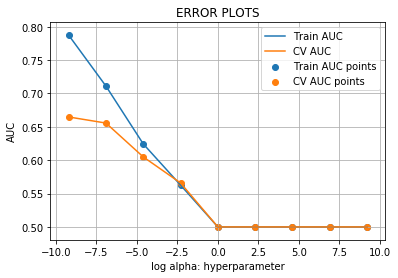

In [76]:
for a in tqdm(alphas):
    b = math.log(a)
    log_alpha.append(b)
    
plt.plot(log_alpha, train_auc, label='Train AUC') 
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points') 
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid()
plt.show()

In [77]:
from numpy import matrix
train_auc = matrix(train_auc)
cv_auc = matrix(cv_auc)

Auc_difference = train_auc - cv_auc
print(Auc_difference)

[[ 0.12259285  0.05536167  0.0194461  -0.00315434  0.          0.
   0.          0.          0.        ]]


In [78]:
Auc_difference = np.array(Auc_difference)
print(Auc_difference)

[[ 0.12259285  0.05536167  0.0194461  -0.00315434  0.          0.
   0.          0.          0.        ]]


In [79]:
Auc_difference = Auc_difference.flatten()
Auc_difference = Auc_difference.tolist()
print(Auc_difference)

[0.12259284603291576, 0.05536166680376897, 0.019446098892266228, -0.0031543371970707, 0.0, 0.0, 0.0, 0.0, 0.0]


In [80]:
best_a_l1 = alphas[Auc_difference.index(min(Auc_difference))]

print('Best hyper parameter value is = ', best_a_l1)

Best hyper parameter value is =  0.1


### Train model using the best hyper-parameter value (l1 penalty)

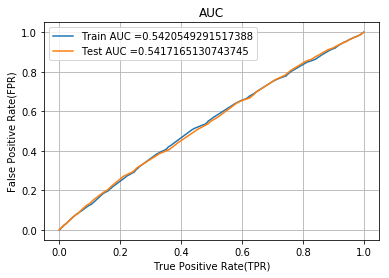

In [81]:
# https://scikit- learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve 
from sklearn.metrics import roc_curve, auc

lsvm = SGDClassifier(loss='hinge', penalty='l1', alpha=best_a_l1, class_weight='balanced')
lsvm.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
sig_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(sig_clf, X_tr) 
y_test_pred = batch_predict(sig_clf, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid()
plt.show()

### D) Confusion matrix

In [82]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3)) 
    predictions = []
    for i in proba:
        if i>=t: 
            predictions.append(1)
        else: 
            predictions.append(0)
    return predictions

#### Train Data

In [83]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2859351229782943 for threshold 0.848
[[ 3867  3559]
 [19381 22234]]


In [84]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2859351229782943 for threshold 0.848


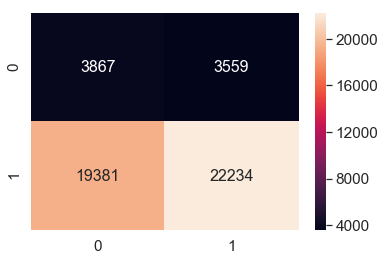

In [85]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

In [86]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2859351229782943 for threshold 0.848
[[ 2802  2657]
 [14249 16344]]


In [87]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2859351229782943 for threshold 0.848


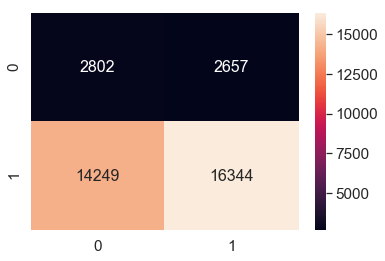

In [88]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### Train model using the best hyper-parameter value (l2 penalty)

In [89]:
train_auc = [] 
cv_auc = []
log_alpha = []

alphas = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]

for i in tqdm(alphas):
    lsvm = SGDClassifier(loss='hinge', penalty='l2', alpha=i, class_weight='balanced') 
    lsvm.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
    sig_clf.fit(X_tr, y_train)
    
    y_train_pred = batch_predict(sig_clf, X_tr) 
    y_cv_pred = batch_predict(sig_clf, X_cr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))



100%|██████████| 9/9 [00:09<00:00,  1.08s/it]


100%|██████████| 9/9 [00:00<00:00, 20460.02it/s]


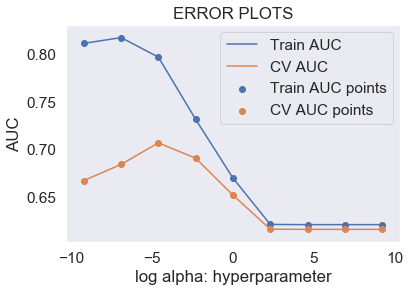

In [90]:
for a in tqdm(alphas):
    b = math.log(a)
    log_alpha.append(b)
    
plt.plot(log_alpha, train_auc, label='Train AUC') 
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points') 
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid()
plt.show()

In [91]:
train_auc = matrix(train_auc)
cv_auc = matrix(cv_auc)

Auc_difference = train_auc - cv_auc
print(Auc_difference)

[[0.14432407 0.1333527  0.09020797 0.04077918 0.01796848 0.00500632
  0.00498028 0.0049826  0.00498088]]


In [92]:
Auc_difference = np.array(Auc_difference)
print(Auc_difference)

[[0.14432407 0.1333527  0.09020797 0.04077918 0.01796848 0.00500632
  0.00498028 0.0049826  0.00498088]]


In [93]:
Auc_difference = Auc_difference.flatten()
Auc_difference = Auc_difference.tolist()
print(Auc_difference)

[0.14432407492143684, 0.13335269745968625, 0.09020796656862606, 0.04077917783929652, 0.017968480640962903, 0.0050063200340099145, 0.004980281030064759, 0.00498259536503276, 0.0049808762457901334]


In [94]:
best_a_l2 = alphas[Auc_difference.index(min(Auc_difference))]

print('Best hyper parameter value is = ', best_a_l2)

Best hyper parameter value is =  100


### C) Train model using the best hyper-parameter value (L2 penalty)

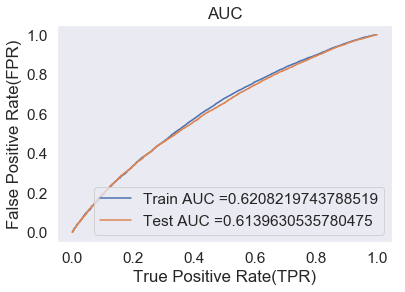

In [95]:
# https://scikit- learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve 
from sklearn.metrics import roc_curve, auc

lsvm = SGDClassifier(loss='hinge', penalty='l2', alpha=best_a_l2, class_weight='balanced')
lsvm.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
sig_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(sig_clf, X_tr) 
y_test_pred = batch_predict(sig_clf, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid()
plt.show()

#### Train Data

In [97]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3457984210682491 for threshold 0.841
[[ 4260  3166]
 [16662 24953]]


In [98]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.3457984210682491 for threshold 0.841


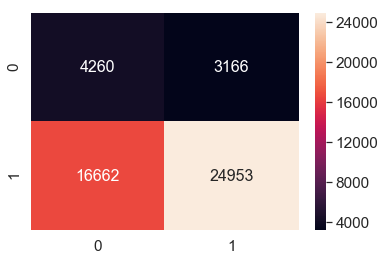

In [99]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

In [100]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3457984210682491 for threshold 0.841
[[ 3618  1841]
 [15946 14647]]


In [101]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.3457984210682491 for threshold 0.841


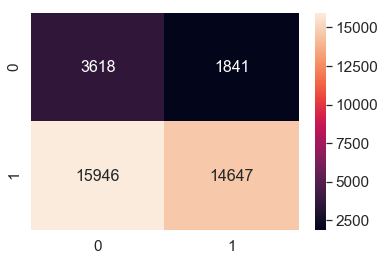

In [102]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

### Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)

In [102]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, num_prev_proj_train, title_word_count_train, essay_word_count_train, title_tfidf_train, text_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, num_prev_proj_test, title_word_count_test, essay_word_count_test, title_tfidf_test, text_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, num_prev_proj_cv, title_word_count_cv, essay_word_count_cv, title_tfidf_cv, text_tfidf_cv)).tocsr()

In [103]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape) 
print(X_te.shape, y_test.shape) 
print(X_cr.shape, y_cv.shape) 
print("="*100)

Final Data matrix
(49041, 14340) (49041,)
(36052, 14340) (36052,)
(24155, 14340) (24155,)


100%|██████████| 9/9 [00:00<00:00, 46660.98it/s]


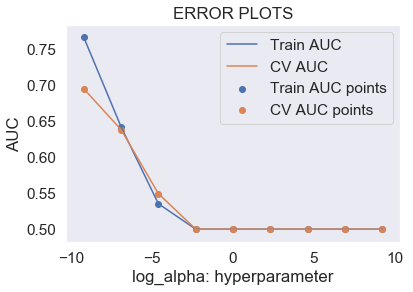

In [104]:
train_auc = [] 
cv_auc = []
log_alpha = []

alphas = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]

for i in tqdm(alphas):
    lsvm = SGDClassifier(loss='hinge', penalty='l1', alpha=i, class_weight='balanced') 
    lsvm.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
    sig_clf.fit(X_tr, y_train)
    
    y_train_pred = batch_predict(sig_clf, X_tr) 
    y_cv_pred = batch_predict(sig_clf, X_cr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alpha.append(b)
    
plt.plot(log_alpha, train_auc, label='Train AUC') 
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points') 
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log_alpha: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid()
plt.show()

In [105]:
from numpy import matrix
train_auc = matrix(train_auc)
cv_auc = matrix(cv_auc)

Auc_difference = train_auc - cv_auc

Auc_difference = np.array(Auc_difference)

Auc_difference = Auc_difference.flatten()
Auc_difference = Auc_difference.tolist()
print(Auc_difference)

[0.0714499823457857, 0.003884472833778463, -0.014046083462190051, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [106]:
best_a_l1 = alphas[Auc_difference.index(min(Auc_difference))]

print('Best hyper parameter value is = ', best_a_l1)

Best hyper parameter value is =  0.01


### Train model using the best hyper-parameter value (l1 penalty)

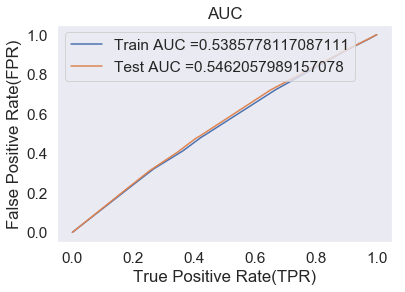

In [107]:
lsvm = SGDClassifier(loss='hinge', penalty='l1', alpha=best_a_l1, class_weight='balanced')
lsvm.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
sig_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(sig_clf, X_tr) 
y_test_pred = batch_predict(sig_clf, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix

#### Train Data

In [108]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2777548798269078 for threshold 0.84
[[ 4207  3219]
 [21212 20403]]


In [109]:
conf_matr_df_train_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2777548798269078 for threshold 0.84


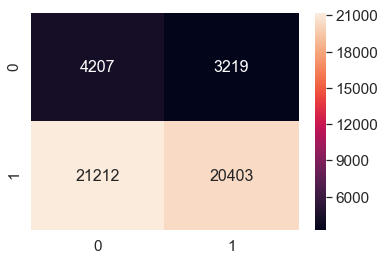

In [110]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

In [111]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2777548798269078 for threshold 0.84
[[ 3183  2276]
 [15743 14850]]


In [112]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2777548798269078 for threshold 0.84


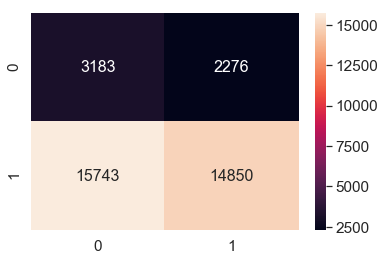

In [113]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True, annot_kws={"size": 16}, fmt='g')

100%|██████████| 9/9 [00:00<00:00, 19348.40it/s]


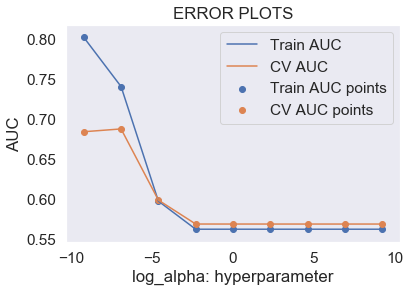

In [114]:
train_auc = [] 
cv_auc = []
log_alpha = []

alphas = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]

for i in tqdm(alphas):
    lsvm = SGDClassifier(loss='hinge', penalty='l2', alpha=i, class_weight='balanced') 
    lsvm.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
    sig_clf.fit(X_tr, y_train)
    
    y_train_pred = batch_predict(sig_clf, X_tr) 
    y_cv_pred = batch_predict(sig_clf, X_cr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alpha.append(b)
    
plt.plot(log_alpha, train_auc, label='Train AUC') 
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points') 
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log_alpha: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid()
plt.show()

In [115]:
from numpy import matrix
train_auc = matrix(train_auc)
cv_auc = matrix(cv_auc)

Auc_difference = train_auc - cv_auc

Auc_difference = np.array(Auc_difference)

Auc_difference = Auc_difference.flatten()
Auc_difference = Auc_difference.tolist()
print(Auc_difference)

[0.11792267024468861, 0.052893249486592464, -0.0012730206356811324, -0.006492192027890309, -0.0064620367077729, -0.006461282495331622, -0.006461282495331622, -0.006461282495331622, -0.006461282495331622]


In [116]:
best_a_l2 = alphas[Auc_difference.index(min(Auc_difference))]

print('Best hyper parameter value is = ', best_a_l2)

Best hyper parameter value is =  0.1


### Train model using the best hyper-parameter value (L2 Penalty)

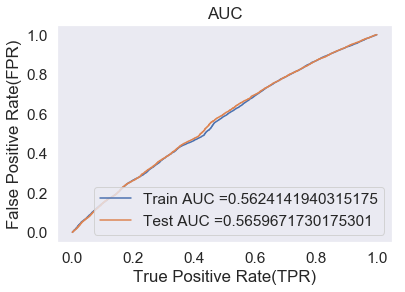

In [117]:
lsvm = SGDClassifier(loss='hinge', penalty='l2', alpha=best_a_l2, class_weight='balanced')
lsvm.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
sig_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(sig_clf, X_tr) 
y_test_pred = batch_predict(sig_clf, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix

#### Train Data

In [118]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.29579784346001375 for threshold 0.847
[[ 4211  3215]
 [21141 20474]]


In [119]:
conf_matr_df_train_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.29579784346001375 for threshold 0.847


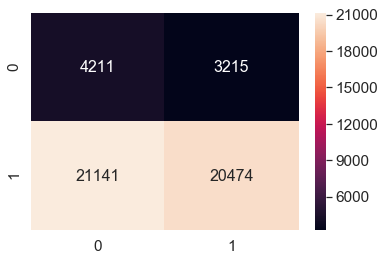

In [120]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

In [121]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.29579784346001375 for threshold 0.847
[[ 3193  2266]
 [15692 14901]]


In [122]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.29579784346001375 for threshold 0.847


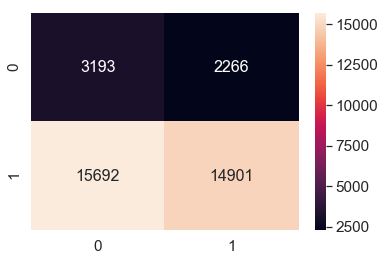

In [123]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True, annot_kws={"size": 16}, fmt='g')

### Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)

In [138]:
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, num_prev_proj_train, title_word_count_train, essay_word_count_train, avg_w2v_vectors_train, avg_w2v_vectors_titles_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, num_prev_proj_test, title_word_count_test, essay_word_count_test, avg_w2v_vectors_test, avg_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, num_prev_proj_cv, title_word_count_cv, essay_word_count_cv, avg_w2v_vectors_cv, avg_w2v_vectors_titles_cv)).tocsr()

In [139]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape) 
print(X_te.shape, y_test.shape) 
print(X_cr.shape, y_cv.shape) 
print("="*100)

Final Data matrix
(49041, 704) (49041,)
(36052, 704) (36052,)
(24155, 704) (24155,)


100%|██████████| 9/9 [00:00<00:00, 25575.02it/s]


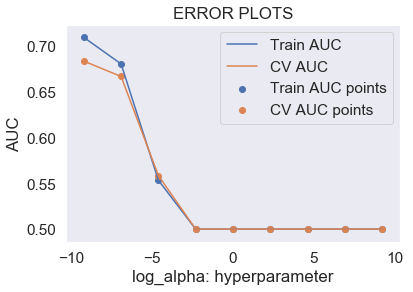

In [140]:
train_auc = [] 
cv_auc = []
log_alpha = []

alphas = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]

for i in tqdm(alphas):
    lsvm = SGDClassifier(loss='hinge', penalty='l1', alpha=i, class_weight='balanced') 
    lsvm.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
    sig_clf.fit(X_tr, y_train)
    
    y_train_pred = batch_predict(sig_clf, X_tr) 
    y_cv_pred = batch_predict(sig_clf, X_cr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alpha.append(b)
    
plt.plot(log_alpha, train_auc, label='Train AUC') 
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points') 
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log_alpha: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid()
plt.show()

In [141]:
train_auc = matrix(train_auc)
cv_auc = matrix(cv_auc)

Auc_difference = train_auc - cv_auc

Auc_difference = np.array(Auc_difference)

Auc_difference = Auc_difference.flatten()
Auc_difference = Auc_difference.tolist()
print(Auc_difference)

[0.025953889072017122, 0.01369022915349305, -0.005155778550863022, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [142]:
best_a_l1 = alphas[Auc_difference.index(min(Auc_difference))]

print('Best hyper parameter value is = ', best_a_l1)

Best hyper parameter value is =  0.01


### Train model using the best hyper-parameter value (L1 Penalty)

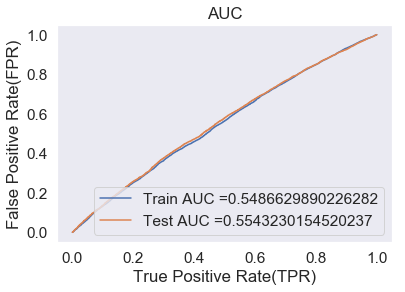

In [143]:
lsvm = SGDClassifier(loss='hinge', penalty='l1', alpha=best_a_l1, class_weight='balanced')
lsvm.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
sig_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(sig_clf, X_tr) 
y_test_pred = batch_predict(sig_clf, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix 

#### Train Data

In [144]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2841763787095999 for threshold 0.848
[[ 4237  3189]
 [21427 20188]]


In [145]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2841763787095999 for threshold 0.848


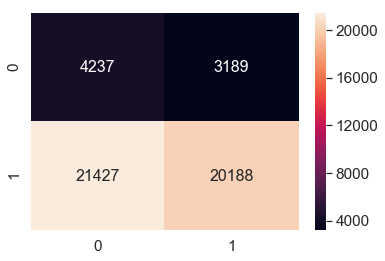

In [146]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

In [147]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2841763787095999 for threshold 0.848
[[ 3210  2249]
 [15871 14722]]


In [148]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2841763787095999 for threshold 0.848


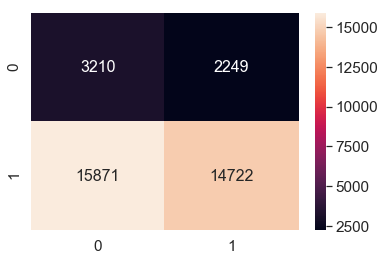

In [149]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_3, annot=True,annot_kws={"size": 16}, fmt='g')

100%|██████████| 9/9 [00:00<00:00, 20273.22it/s]


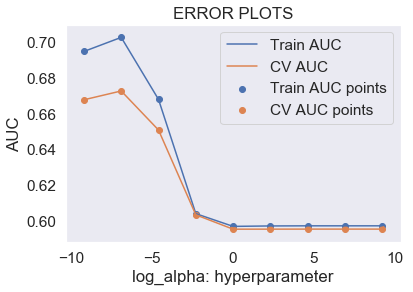

In [150]:
train_auc = [] 
cv_auc = []
log_alpha = []

alphas = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]

for i in tqdm(alphas):
    lsvm = SGDClassifier(loss='hinge', penalty='l2', alpha=i, class_weight='balanced') 
    lsvm.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
    sig_clf.fit(X_tr, y_train)
    
    y_train_pred = batch_predict(sig_clf, X_tr) 
    y_cv_pred = batch_predict(sig_clf, X_cr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alpha.append(b)
    
plt.plot(log_alpha, train_auc, label='Train AUC') 
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points') 
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log_alpha: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid()
plt.show()

In [151]:
train_auc = matrix(train_auc)
cv_auc = matrix(cv_auc)

Auc_difference = train_auc - cv_auc

Auc_difference = np.array(Auc_difference)

Auc_difference = Auc_difference.flatten()
Auc_difference = Auc_difference.tolist()
print(Auc_difference)

[0.026955604649799403, 0.02989940784979228, 0.017079370371656966, 0.0006514871549049284, 0.0015578570660528257, 0.0017899470424315167, 0.0018327244574714019, 0.0018337680901531206, 0.0018338646646203216]


In [152]:
best_a_l2 = alphas[Auc_difference.index(min(Auc_difference))]

print('Best hyper parameter value is = ', best_a_l2)

Best hyper parameter value is =  0.1


### Train model using the best hyper-parameter value (L2 Penalty)

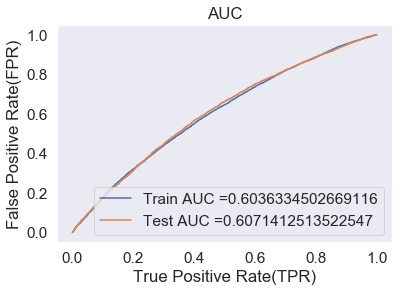

In [153]:
lsvm = SGDClassifier(loss='hinge', penalty='l2', alpha=best_a_l2, class_weight='balanced')
lsvm.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
sig_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(sig_clf, X_tr) 
y_test_pred = batch_predict(sig_clf, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix

#### Train Data

In [154]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.33189207404685167 for threshold 0.852
[[ 4531  2895]
 [19292 22323]]


In [155]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.33189207404685167 for threshold 0.852


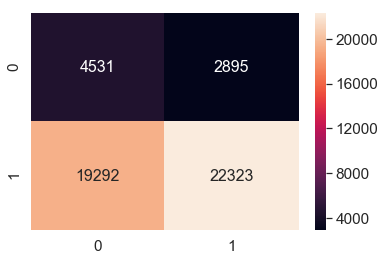

In [156]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3, annot=True, annot_kws={"size": 16}, fmt='g')

#### Test Data

In [157]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.33189207404685167 for threshold 0.852
[[ 3496  1963]
 [14886 15707]]


In [158]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.33189207404685167 for threshold 0.852


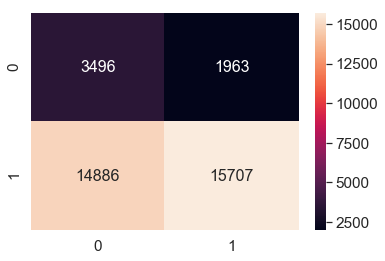

In [159]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_3, annot=True,annot_kws={"size": 16}, fmt='g')

### Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)

In [168]:
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, num_prev_proj_train, title_word_count_train, essay_word_count_train, tfidf_w2v_vectors_train, tfidf_w2v_vectors_titles_train)). tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, num_prev_proj_test, title_word_count_test, essay_word_count_test, tfidf_w2v_vectors_test, tfidf_w2v_vectors_titles_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, num_prev_proj_cv, title_word_count_cv, essay_word_count_cv, tfidf_w2v_vectors_cv, tfidf_w2v_vectors_titles_cv)).tocsr()

In [169]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape) 
print(X_te.shape, y_test.shape) 
print(X_cr.shape, y_cv.shape) 
print("="*100)

Final Data matrix
(49041, 704) (49041,)
(36052, 704) (36052,)
(24155, 704) (24155,)


100%|██████████| 9/9 [00:00<00:00, 24401.25it/s]


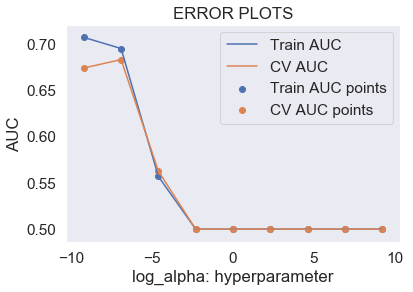

In [170]:
train_auc = [] 
cv_auc = []
log_alpha = []

alphas = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]

for i in tqdm(alphas):
    lsvm = SGDClassifier(loss='hinge', penalty='l1', alpha=i, class_weight='balanced') 
    lsvm.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
    sig_clf.fit(X_tr, y_train)
    
    y_train_pred = batch_predict(sig_clf, X_tr) 
    y_cv_pred = batch_predict(sig_clf, X_cr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alpha.append(b)
    
plt.plot(log_alpha, train_auc, label='Train AUC') 
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points') 
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log_alpha: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid()
plt.show()

In [171]:
from numpy import matrix
train_auc = matrix(train_auc)
cv_auc = matrix(cv_auc)

Auc_difference = train_auc - cv_auc

Auc_difference = np.array(Auc_difference)

Auc_difference = Auc_difference.flatten()
Auc_difference = Auc_difference.tolist()
print(Auc_difference)

[0.03305039102347085, 0.011904279223600378, -0.005791045403432893, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [172]:
best_a_l1 = alphas[Auc_difference.index(min(Auc_difference))]

print('Best hyper parameter value is = ', best_a_l1)

Best hyper parameter value is =  0.01


### Train model using the best hyper-parameter value (L1 Penalty)

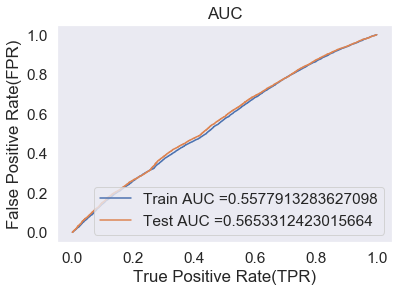

In [173]:
lsvm = SGDClassifier(loss='hinge', penalty='l1', alpha=best_a_l1, class_weight='balanced')
lsvm.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
sig_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(sig_clf, X_tr) 
y_test_pred = batch_predict(sig_clf, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix

#### Train Data

In [174]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.28704319885071167 for threshold 0.844
[[ 4158  3268]
 [20847 20768]]


In [175]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.28704319885071167 for threshold 0.844


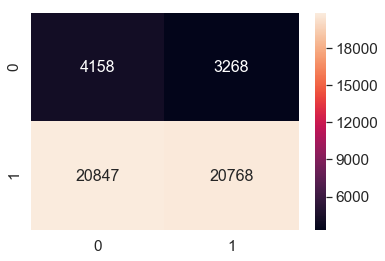

In [176]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_4, annot=True,annot_kws={"size": 16}, fmt='g')

#### Test Data

In [177]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2945505932029141 for threshold 0.856
[[ 3901  1558]
 [19401 11192]]


In [178]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.28704319885071167 for threshold 0.844


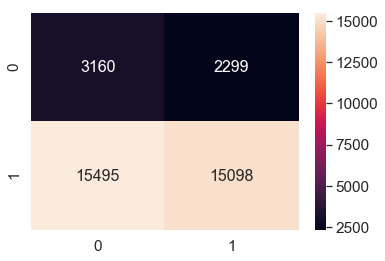

In [179]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')

100%|██████████| 9/9 [00:00<00:00, 47662.55it/s]


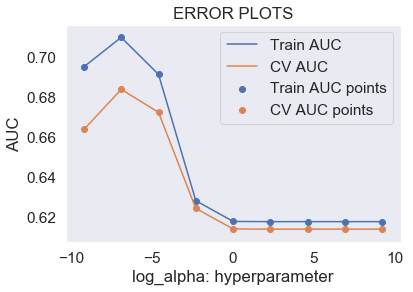

In [180]:
train_auc = [] 
cv_auc = []
log_alpha = []

alphas = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]

for i in tqdm(alphas):
    lsvm = SGDClassifier(loss='hinge', penalty='l2', alpha=i, class_weight='balanced') 
    lsvm.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
    sig_clf.fit(X_tr, y_train)
    
    y_train_pred = batch_predict(sig_clf, X_tr) 
    y_cv_pred = batch_predict(sig_clf, X_cr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alpha.append(b)
    
plt.plot(log_alpha, train_auc, label='Train AUC') 
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points') 
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log_alpha: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid()
plt.show()

In [181]:
train_auc = matrix(train_auc)
cv_auc = matrix(cv_auc)

Auc_difference = train_auc - cv_auc

Auc_difference = np.array(Auc_difference)

Auc_difference = Auc_difference.flatten()
Auc_difference = Auc_difference.tolist()
print(Auc_difference)

[0.031357449463614295, 0.02600912557643642, 0.018969338431510496, 0.0038943541124255576, 0.0037374227259395765, 0.0037670312619187962, 0.003763686997471427, 0.0037634416935752313, 0.0037637064917738217]


In [182]:
best_a_l2 = alphas[Auc_difference.index(min(Auc_difference))]

print('Best hyper parameter value is = ', best_a_l2)

Best hyper parameter value is =  1


### Train model using the best hyper-parameter value ( L2 Penalty)

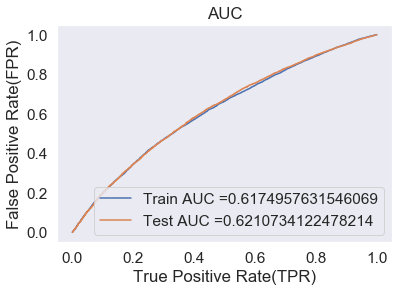

In [183]:
lsvm = SGDClassifier(loss='hinge', penalty='l2', alpha=best_a_l2, class_weight='balanced')
lsvm.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
sig_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(sig_clf, X_tr) 
y_test_pred = batch_predict(sig_clf, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix

#### Train Data

In [184]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.34338816059735233 for threshold 0.847
[[ 4288  3138]
 [16960 24655]]


In [185]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.34338816059735233 for threshold 0.847


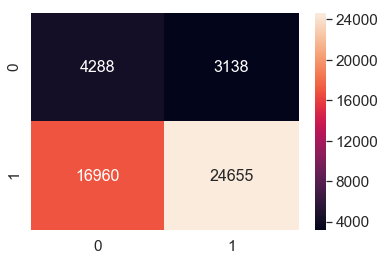

In [186]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_4, annot=True,annot_kws={"size": 16}, fmt='g')

#### Test Data

In [187]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3492330782147717 for threshold 0.863
[[ 3912  1547]
 [16784 13809]]


In [188]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.34338816059735233 for threshold 0.847


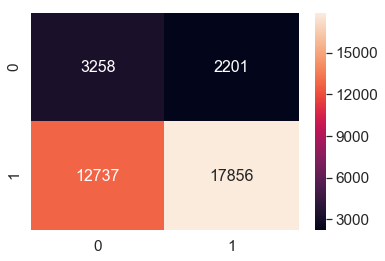

In [189]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [73]:
from sklearn.decomposition import TruncatedSVD as TSVD 
t_svd = TSVD(n_components = text_tfidf_train.shape[1]-1)

t_svd.fit(text_tfidf_train)


TruncatedSVD(algorithm='randomized', n_components=12195, n_iter=5,
       random_state=None, tol=0.0)

In [74]:
percentage_var_explained = t_svd.explained_variance_ / np.sum(t_svd.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

print(cum_var_explained)

[0.00399791 0.01426477 0.02300589 ... 0.99999965 0.99999984 1.        ]


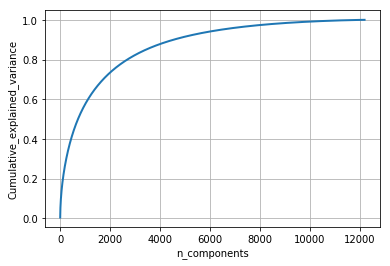

In [75]:
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2) 
plt.axis('tight')
plt.grid()
plt.xlabel('n_components') 
plt.ylabel('Cumulative_explained_variance') 
plt.show()

- Preserving 90% variance, considering 4000 points.

In [77]:
tsvd = TSVD(n_components = 4000)
text_tfidf_train = tsvd.fit_transform(text_tfidf_train) 
text_tfidf_test = tsvd.fit_transform(text_tfidf_test) 
text_tfidf_cv = tsvd.fit_transform(text_tfidf_cv)

In [87]:
from scipy.sparse import hstack
X_tr = hstack((school_state_categories_one_hot_train, categories_one_hot_train, sub_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, quantity_train, num_prev_proj_train, price_train, pos_train, neg_train, com_train, title_word_count_train, essay_word_count_train, text_tfidf_train)).tocsr()
X_te = hstack((school_state_categories_one_hot_test, categories_one_hot_test, sub_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, quantity_test, num_prev_proj_test, price_test, pos_test, neg_test, com_test, title_word_count_test, essay_word_count_test, text_tfidf_test)).tocsr()
X_cr = hstack((school_state_categories_one_hot_cv, categories_one_hot_cv, sub_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, quantity_cv, num_prev_proj_cv, price_cv, pos_cv, neg_cv, com_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv)).tocsr()

In [88]:
print("Final Data matrix") 
print(X_tr.shape, y_train.shape) 
print(X_te.shape, y_test.shape) 
print(X_cr.shape, y_cv.shape) 
print("="*100)

Final Data matrix
(49041, 4107) (49041,)
(36052, 4107) (36052,)
(24155, 4107) (24155,)


100%|██████████| 9/9 [00:00<00:00, 2377.87it/s]


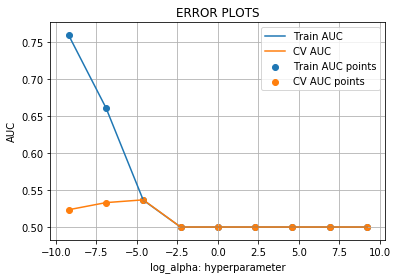

In [89]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

train_auc = [] 
cv_auc = []
log_alpha = []

alphas = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]

for i in tqdm(alphas):
    lsvm = SGDClassifier(loss='hinge', penalty='l1', alpha=i, class_weight='balanced') 
    lsvm.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
    sig_clf.fit(X_tr, y_train)
    
    y_train_pred = batch_predict(sig_clf, X_tr) 
    y_cv_pred = batch_predict(sig_clf, X_cr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alpha.append(b)
    
plt.plot(log_alpha, train_auc, label='Train AUC') 
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points') 
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log_alpha: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid()
plt.show()

In [90]:
from numpy import matrix
train_auc = matrix(train_auc)
cv_auc = matrix(cv_auc)

Auc_difference = train_auc - cv_auc

Auc_difference = np.array(Auc_difference)

Auc_difference = Auc_difference.flatten()
Auc_difference = Auc_difference.tolist()
print(Auc_difference)

[0.23596233921092868, 0.12821559927695747, -0.00038289738111785265, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [91]:
best_a_l1 = alphas[Auc_difference.index(min(Auc_difference))]

print('Best hyper parameter value is = ', best_a_l1)

Best hyper parameter value is =  0.01


### Train model using the best hyper-parameter value

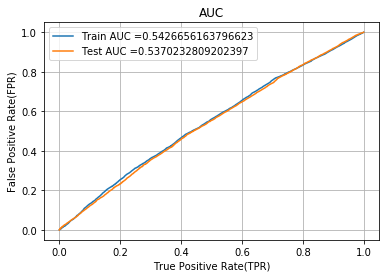

In [92]:
lsvm = SGDClassifier(loss='hinge', penalty='l1', alpha=best_a_l1, class_weight='balanced')
lsvm.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
sig_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(sig_clf, X_tr) 
y_test_pred = batch_predict(sig_clf, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix

#### Train Data

In [95]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.28294918610469383 for threshold 0.836
[[ 4016  3410]
 [20085 21530]]


In [96]:
conf_matr_df_train_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.28294918610469383 for threshold 0.836


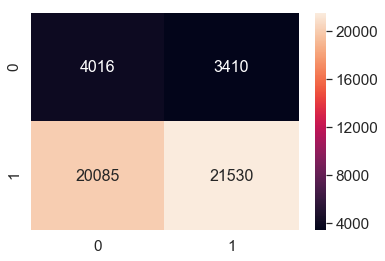

In [97]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_5, annot=True,annot_kws={"size": 16}, fmt='g')

#### Test Data

In [98]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2802824826933945 for threshold 0.837
[[ 3094  2365]
 [15475 15118]]


In [99]:
conf_matr_df_test_5 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2802824826933945 for threshold 0.837


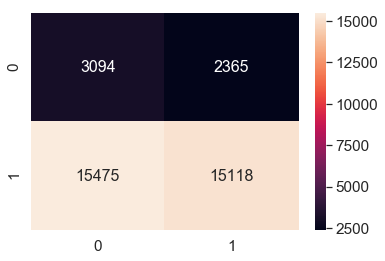

In [100]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_5, annot=True,annot_kws={"size": 16}, fmt='g')

100%|██████████| 9/9 [00:00<00:00, 8553.99it/s]


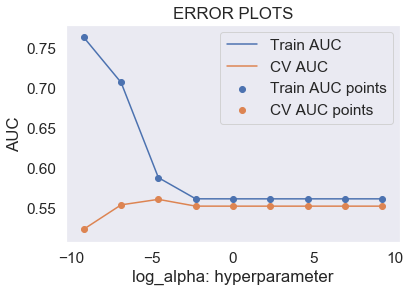

In [101]:
train_auc = [] 
cv_auc = []
log_alpha = []

alphas = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 100, 1000, 10000]

for i in tqdm(alphas):
    lsvm = SGDClassifier(loss='hinge', penalty='l2', alpha=i, class_weight='balanced') 
    lsvm.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
    sig_clf.fit(X_tr, y_train)
    
    y_train_pred = batch_predict(sig_clf, X_tr) 
    y_cv_pred = batch_predict(sig_clf, X_cr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alpha.append(b)
    
plt.plot(log_alpha, train_auc, label='Train AUC') 
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points') 
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log_alpha: hyperparameter") 
plt.ylabel("AUC") 
plt.title("ERROR PLOTS") 
plt.grid()
plt.show()

In [102]:
from numpy import matrix
train_auc = matrix(train_auc)
cv_auc = matrix(cv_auc)

Auc_difference = train_auc - cv_auc

Auc_difference = np.array(Auc_difference)

Auc_difference = Auc_difference.flatten()
Auc_difference = Auc_difference.tolist()
print(Auc_difference)

[0.24048417363848107, 0.15343414476950124, 0.02723026856642119, 0.009175132613870929, 0.009160163251444975, 0.00916072414986524, 0.00916072414986513, 0.00916072414986513, 0.00916072414986513]


In [103]:
best_a_l2 = alphas[Auc_difference.index(min(Auc_difference))]

print('Best hyper parameter value is = ', best_a_l2)

Best hyper parameter value is =  1


### Train model using the best hyper-parameter value (L2 Penalty)

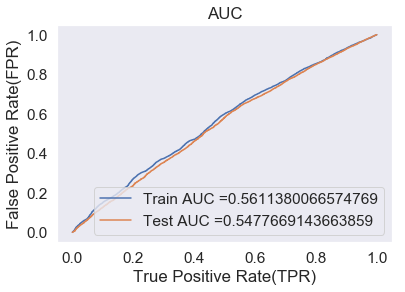

In [104]:
lsvm = SGDClassifier(loss='hinge', penalty='l2', alpha=best_a_l2, class_weight='balanced')
lsvm.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(lsvm, method='sigmoid')
sig_clf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(sig_clf, X_tr) 
y_test_pred = batch_predict(sig_clf, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)") 
plt.title("AUC")
plt.grid()
plt.show()

### Confusion Matrix

#### Train Data

In [105]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3011500390298136 for threshold 0.847
[[ 4323  3103]
 [21329 20286]]


In [106]:
conf_matr_df_train_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.3011500390298136 for threshold 0.847


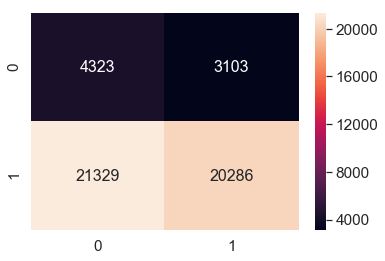

In [107]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_5, annot=True,annot_kws={"size": 16}, fmt='g')

#### Test Data

In [108]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.29161227055456007 for threshold 0.861
[[ 3640  1819]
 [18734 11859]]


In [109]:
conf_matr_df_test_5 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.29161227055456007 for threshold 0.861


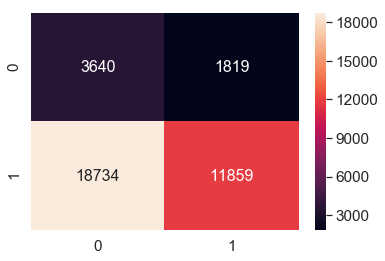

In [110]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_5, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusion</h1>

In [190]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable x=PrettyTable()
x = PrettyTable()
x.field_names = ["Vectorizer", "Regularizer", "Hyper Parameter", "AUC"]
x.add_row(["BOW","L1", 0.1, 0.54])
x.add_row(["BOW","L2", 100, 0.61])
x.add_row(["TFIDF","L1", 0.01, 0.55])
x.add_row(["TFIDF","L2", 0.1, 0.57])
x.add_row(["AVG W2V","L1", 0.01, 0.55])
x.add_row(["AVG W2V","L2", 0.1, 0.61])
x.add_row(["TFIDF W2V","L1", 0.01, 0.57])
x.add_row(["TFIDF W2V","L2", 1, 0.62])
x.add_row(["TRUNCATED TFIDF","L1", 0.01, 0.54])
x.add_row(["TRUNCATED TFIDF","L2", 1, 0.55])
print(x)

+-----------------+-------------+-----------------+------+
|    Vectorizer   | Regularizer | Hyper Parameter | AUC  |
+-----------------+-------------+-----------------+------+
|       BOW       |      L1     |       0.1       | 0.54 |
|       BOW       |      L2     |       100       | 0.61 |
|      TFIDF      |      L1     |       0.01      | 0.55 |
|      TFIDF      |      L2     |       0.1       | 0.57 |
|     AVG W2V     |      L1     |       0.01      | 0.55 |
|     AVG W2V     |      L2     |       0.1       | 0.61 |
|    TFIDF W2V    |      L1     |       0.01      | 0.57 |
|    TFIDF W2V    |      L2     |        1        | 0.62 |
| TRUNCATED TFIDF |      L1     |       0.01      | 0.54 |
| TRUNCATED TFIDF |      L2     |        1        | 0.55 |
+-----------------+-------------+-----------------+------+
